**PzAP projekt**


**Uvod**:
Tema ovog projekta biti će analiza najbogatijih sportskih liga svijeta. Sportski događaji uvijek su popraćeni posjećenošću ljudi. Tako ćemo kroz projekt analizirati posjećenost te kolike prihode donosi takva posjećenost najbogatijim ligama svijeta. Setovi podataka koji će se korisiti preuzeti su s Wikipedije.  

In [1]:
# Uvoz potrebnih knjižnica
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import requests

In [2]:
# Ispis svih sheetova
excel_file = pd.ExcelFile("prviset.xlsx")
print(excel_file.sheet_names)

['Table 0', 'Sheet1']


In [3]:
# Učitavanje prvog seta podataka(excel)
dfPrvi = pd.read_excel("prviset.xlsx", sheet_name='Table 0') # [1]

In [4]:
# Prikaz prvih 10 redaka prvog seta
dfPrvi.head(10)

,Rank,League,Sport,Country(ies),Season,Tier Level,Teams[a],Mat­ches / Games / Events,Rev. (€ mil),Rev. / team (€ mil),Rev. / match (€ thou­sands),Ref.
0,Rank,League,Sport,Country(ies),Season,Tier Level,Teams,Mat­ches / Games / Events,Rev._x000D_\n(€ mil),Rev. / team_x000D_\n(€ mil),Rev. / match_x000D_\n(€ thou­sands),Ref.
1,1,National Football League (NFL),American football,United States,2023,1,32,285,"19,299",603,"67,716",NaN
2,2,National Basketball Association (NBA),Basketball,United States _x000D_\nCanada,2023–24,1,30,"1,320","12,010",400,"9,098",NaN
3,3,Major League Baseball (MLB),Baseball,United States _x000D_\nCanada,2023,1,30,"2,430","11,319",377,"4,658",NaN
4,4,Premier League (PL),Association football,England,2022–23,1,20,380,"7,100",355,"18,684",NaN
5,5,National Hockey League (NHL),Ice hockey,Canada_x000D_\nUnited States,2022–23,1,32,"1,400","6,069",189,"4,334",NaN
6,6,Campeonato Nacional de Liga de Primera Divisió...,Association football,Spain,2022–23,1,20,380,"5,240",262,"13,789",NaN
7,7,Fußball-Bundesliga (Bundesliga),Association football,Germany,2022–23,1,18,306,"4,452",247,"14,549",NaN
8,8,Lega Nazionale Professionisti Serie A (Serie A),Association football,Italy,2022–23,1,20,380,"3,618",181,"9,521",NaN
9,9,Championnat de France de football (Ligue 1),Association football,France_x000D_\nMonaco,2022–23,1,20,380,"2,378",115.4,"8,328",NaN


In [5]:
# Prikaz informacija o setu podataka
dfPrvi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Rank                         113 non-null    object
 1   League                       113 non-null    object
 2   Sport                        113 non-null    object
 3   Country(ies)                 113 non-null    object
 4   Season                       113 non-null    object
 5   Tier Level                   113 non-null    object
 6   Teams[a]                     113 non-null    object
 7   Mat­ches / Games / Events    113 non-null    object
 8   Rev. (€ mil)                 113 non-null    object
 9   Rev. / team (€ mil)          113 non-null    object
 10  Rev. / match (€ thou­sands)  113 non-null    object
 11  Ref.                         1 non-null      object
dtypes: object(12)
memory usage: 10.7+ KB


In [6]:
# Brisanje stupca 'Ref.' koji sadrži reference na izvor podataka. Stupac nije potreban u daljnjoj analizi.
del dfPrvi['Ref.']

In [7]:
# Brisanje nultog retka tablice koji sadrži nazive stupaca. Redak isto tako nije potreban u daljnoj analizi.
dfPrvi = dfPrvi.drop(0)

In [8]:
# Prikaz prvih 10 redaka seta nakon promjena
dfPrvi.head(10)

,Rank,League,Sport,Country(ies),Season,Tier Level,Teams[a],Mat­ches / Games / Events,Rev. (€ mil),Rev. / team (€ mil),Rev. / match (€ thou­sands)
1,1,National Football League (NFL),American football,United States,2023,1,32,285,"19,299",603,"67,716"
2,2,National Basketball Association (NBA),Basketball,United States _x000D_\nCanada,2023–24,1,30,"1,320","12,010",400,"9,098"
3,3,Major League Baseball (MLB),Baseball,United States _x000D_\nCanada,2023,1,30,"2,430","11,319",377,"4,658"
4,4,Premier League (PL),Association football,England,2022–23,1,20,380,"7,100",355,"18,684"
5,5,National Hockey League (NHL),Ice hockey,Canada_x000D_\nUnited States,2022–23,1,32,"1,400","6,069",189,"4,334"
6,6,Campeonato Nacional de Liga de Primera Divisió...,Association football,Spain,2022–23,1,20,380,"5,240",262,"13,789"
7,7,Fußball-Bundesliga (Bundesliga),Association football,Germany,2022–23,1,18,306,"4,452",247,"14,549"
8,8,Lega Nazionale Professionisti Serie A (Serie A),Association football,Italy,2022–23,1,20,380,"3,618",181,"9,521"
9,9,Championnat de France de football (Ligue 1),Association football,France_x000D_\nMonaco,2022–23,1,20,380,"2,378",115.4,"8,328"
10,10,Major League Soccer (MLS),Association football,United States_x000D_\nCanada,2023,1,29,493,"1,849",63.7,"3,751"


In [10]:
# Linija koda koja uklanja zankove '[,]' te takve vrijednosti pretvara u float kako bi omogućili operacije nad stupcom.
dfPrvi['Rev. (€ mil)'] = dfPrvi['Rev. (€ mil)'].replace('[,]', '', regex=True).astype(float) #[3]

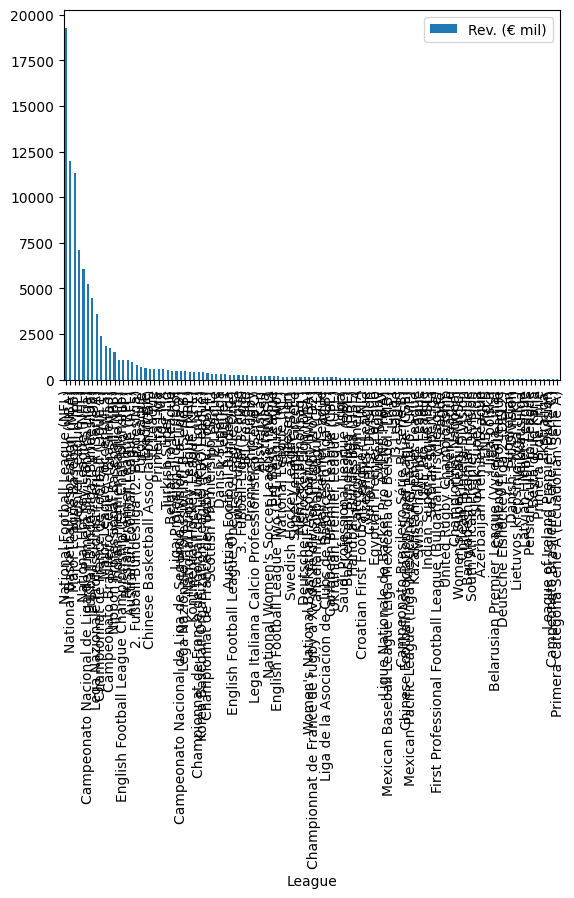

In [11]:
# Graf koji prikazuje lige, te njihove prihode
dfPrvi.plot.bar(x='League', y='Rev. (€ mil)', rot=90);

In [12]:
dfPrvi.head(10)

,Rank,League,Sport,Country(ies),Season,Tier Level,Teams[a],Mat­ches / Games / Events,Rev. (€ mil),Rev. / team (€ mil),Rev. / match (€ thou­sands)
1,1,National Football League (NFL),American football,United States,2023,1,32,285,19299.0,603,"67,716"
2,2,National Basketball Association (NBA),Basketball,United States _x000D_\nCanada,2023–24,1,30,"1,320",12010.0,400,"9,098"
3,3,Major League Baseball (MLB),Baseball,United States _x000D_\nCanada,2023,1,30,"2,430",11319.0,377,"4,658"
4,4,Premier League (PL),Association football,England,2022–23,1,20,380,7100.0,355,"18,684"
5,5,National Hockey League (NHL),Ice hockey,Canada_x000D_\nUnited States,2022–23,1,32,"1,400",6069.0,189,"4,334"
6,6,Campeonato Nacional de Liga de Primera Divisió...,Association football,Spain,2022–23,1,20,380,5240.0,262,"13,789"
7,7,Fußball-Bundesliga (Bundesliga),Association football,Germany,2022–23,1,18,306,4452.0,247,"14,549"
8,8,Lega Nazionale Professionisti Serie A (Serie A),Association football,Italy,2022–23,1,20,380,3618.0,181,"9,521"
9,9,Championnat de France de football (Ligue 1),Association football,France_x000D_\nMonaco,2022–23,1,20,380,2378.0,115.4,"8,328"
10,10,Major League Soccer (MLS),Association football,United States_x000D_\nCanada,2023,1,29,493,1849.0,63.7,"3,751"


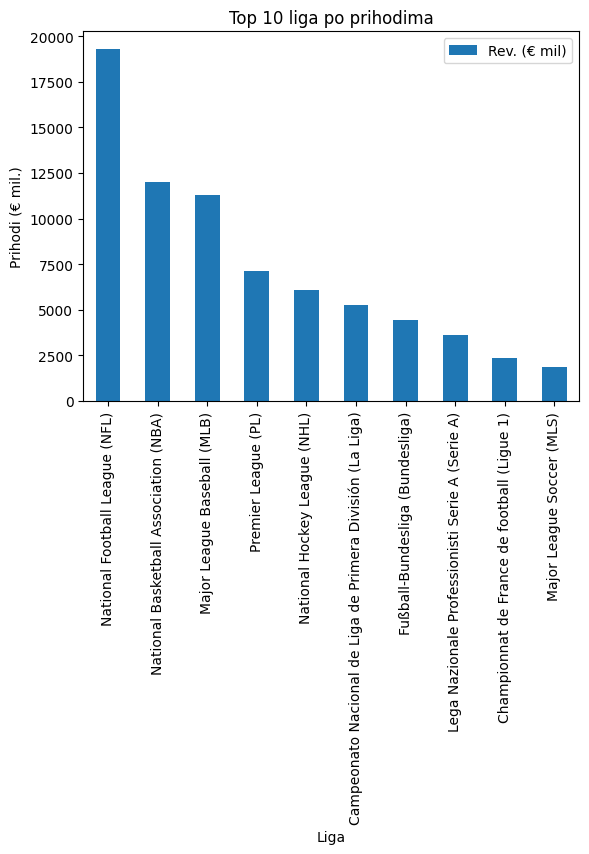

In [13]:
# Graf koji prikazuje top 10 liga prema prihodima.
top_10 = dfPrvi.sort_values(by='Rev. (€ mil)', ascending=False).head(10) # Sortiranje stupca 'Rev. (€ mil)' od najveće prema najmanjoj vrijednosti te ispis samo prvih 10 redaka
top_10.plot.bar(x='League', y='Rev. (€ mil)', rot=90) # Definiranje x i y osi uz ispis imena liga pod kutem od 90 stupnjeva
plt.title('Top 10 liga po prihodima') # Naziv grafa
plt.xlabel('Liga') # Naziv x osi
plt.ylabel('Prihodi (€ mil.)') # Naziv y osi
plt.show() # Prikaz grafa

In [14]:
# Učitavanje drugog seta podataka(json)
dfDrugi = pd.read_json('drugi.txt') # [2]

In [15]:
# Prikaz prvhi 10 redaka drugog seta
dfDrugi.head(10)

,League,Sport,Countries,Pyramid level,Season,Teams,Games,Average capacity,Average attendance,Average attendance as % of average capacity,Total attendance,Ref(s)
0,League,Sport,Countries,Pyramid\nlevel,Season,Teams,Games,Average\ncapacity,Average\nattendance,Average\nattendance \nas % of\naverage\ncapacity,Total\nattendance,Ref(s)
1,Major League Baseball (MLB),Baseball,United States\nCanada,1,2024,30,"2,430","43,103","29,361",68.12,"71,348,366",
2,Nippon Professional Baseball (NPB),Baseball,Japan,1,2024,12,858,"35,526","31,098",87.54,"26,681,715",
3,National Hockey League (NHL),Ice hockey,United States\nCanada,1,2022–23,32,"1,310","18,332 *","17,099",95.43,"22,402,861",
4,National Basketball Association (NBA),Basketball,United States\nCanada,1,2022–23,30,"1,230","19,122 *","18,077",94.06,"22,234,502",
5,National Football League (NFL),American football,United States,1,2018,32,256,"69,800","67,100",96.13,"17,177,581",
6,Premier League (Premier League),Association football,England,1,2023-24,20,380,"39,646","38,390",96.83,"14,473,017",
7,International League (IL) /\nPacific Coast Lea...,Baseball,United States,2,2019,30,"2,023","11,149","6,697",59.33,"13,500,376",
8,Major League Soccer (MLS),Association football,United States\nCanada,1,2024,29,522,"24,348","23,279",95.60,"12,151,608",
9,Fußball-Bundesliga (Bundesliga),Association football,Germany,1,2023–24,18,306,"40,933","39,490",96.51,"12,083,936",


In [16]:
# Prikaz informacija o drugome setu
dfDrugi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 12 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   League                                        21 non-null     object
 1   Sport                                         21 non-null     object
 2   Countries                                     21 non-null     object
 3   Pyramid level                                 21 non-null     object
 4   Season                                        21 non-null     object
 5   Teams                                         21 non-null     object
 6   Games                                         21 non-null     object
 7   Average capacity                              21 non-null     object
 8   Average attendance                            21 non-null     object
 9   Average attendance  as % of average capacity  21 non-null     object
 10  Tota

In [17]:
# Brisanje stupca 'Ref(s)' koji sadrži reference na izvor podataka koje nisu potrebne u daljnjoj analizi.
del dfDrugi['Ref(s)']

In [18]:
# Brisanje nultog retka tablice koji sadrži nazive stupaca. Redak isto tako nije potreban u daljnoj analizi.
dfDrugi = dfDrugi.drop(0)

In [19]:
# Linija koda koja iz stupca 'Total attendance' uklanja zank '[,]' te takve vrijednosti pretvara u float kako bi omogućili operacije nad stupcom.
dfDrugi['Total attendance'] = dfDrugi['Total attendance'].replace('[,]', '', regex=True).astype(float)

In [20]:
dfDrugi.head(10)

,League,Sport,Countries,Pyramid level,Season,Teams,Games,Average capacity,Average attendance,Average attendance as % of average capacity,Total attendance
1,Major League Baseball (MLB),Baseball,United States\nCanada,1,2024,30,"2,430","43,103","29,361",68.12,71348366.0
2,Nippon Professional Baseball (NPB),Baseball,Japan,1,2024,12,858,"35,526","31,098",87.54,26681715.0
3,National Hockey League (NHL),Ice hockey,United States\nCanada,1,2022–23,32,"1,310","18,332 *","17,099",95.43,22402861.0
4,National Basketball Association (NBA),Basketball,United States\nCanada,1,2022–23,30,"1,230","19,122 *","18,077",94.06,22234502.0
5,National Football League (NFL),American football,United States,1,2018,32,256,"69,800","67,100",96.13,17177581.0
6,Premier League (Premier League),Association football,England,1,2023-24,20,380,"39,646","38,390",96.83,14473017.0
7,International League (IL) /\nPacific Coast Lea...,Baseball,United States,2,2019,30,"2,023","11,149","6,697",59.33,13500376.0
8,Major League Soccer (MLS),Association football,United States\nCanada,1,2024,29,522,"24,348","23,279",95.60,12151608.0
9,Fußball-Bundesliga (Bundesliga),Association football,Germany,1,2023–24,18,306,"40,933","39,490",96.51,12083936.0
10,Campeonato Nacional de Liga de Primera Divisió...,Association football,Spain,1,2022–23,20,380,"38,781","30,500",78.64,11600000.0


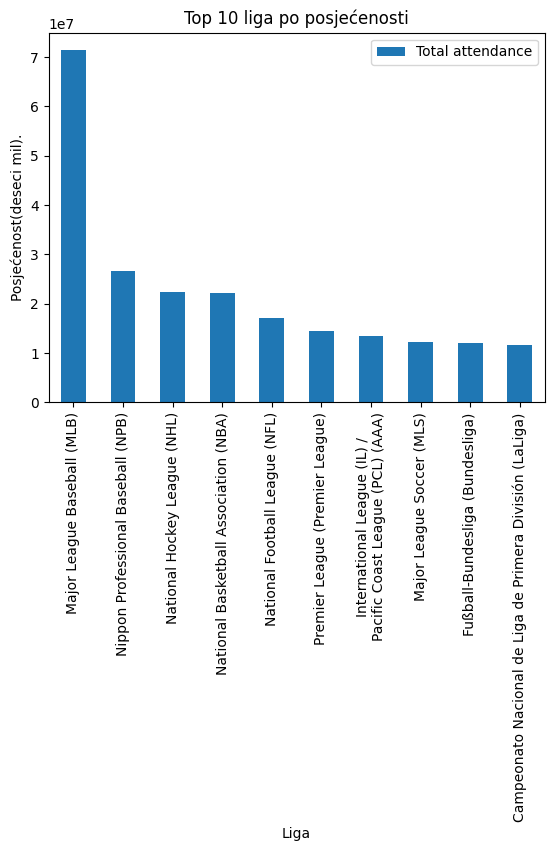

In [21]:
# Graf koji prikazuje top 10 liga prema posjećenosti.
top_10 = dfDrugi.sort_values(by='Total attendance', ascending=False).head(10) # Sortiranje stupca 'Total attendance' od najveće prema najmanjoj vrijednosti te ispis samo prvih 10 redaka
top_10.plot.bar(x='League', y='Total attendance', rot=90) # Definiranje x i y osi uz ispis imena liga pod kutem od 90 stupnjeva
plt.title('Top 10 liga po posjećenosti') # Naziv grafa
plt.xlabel('Liga') # Naziv x osi
plt.ylabel('Posjećenost(deseci mil).') # Naziv y osi
plt.show() # Prikaz grafa

In [22]:
# Spajanje dvoje setova u jedan
df_att_rev = pd.merge(dfDrugi[['League', 'Total attendance']], # Selektiranje stupaca iz drugog seta
                      dfPrvi[['League', 'Rev. (€ mil)']],  # Selektiranje stupaca iz prvog seta
                      on='League', # Spajane setova pomoću ključa 'League'
                      how='inner') # Vrijednosti se podudaraju iz oba seta
df_att_rev.head(15)

,League,Total attendance,Rev. (€ mil)
0,Major League Baseball (MLB),71348366.0,11319.0
1,Nippon Professional Baseball (NPB),26681715.0,1506.0
2,National Hockey League (NHL),22402861.0,6069.0
3,National Basketball Association (NBA),22234502.0,12010.0
4,National Football League (NFL),17177581.0,19299.0
5,Major League Soccer (MLS),12151608.0,1849.0
6,Fußball-Bundesliga (Bundesliga),12083936.0,4452.0
7,Lega Nazionale Professionisti Serie A (Serie A),11200000.0,3618.0
8,Championnat de France de football (Ligue 1),9200000.0,2378.0
9,Campeonato Brasileiro Série A (Brasileirão),8501700.0,1705.0


In [23]:
# Prilagodba veličine podataka stupca 'Total attendance'
df_att_rev['Total attendance'] = df_att_rev['Total attendance'] / 1000 # Dijeljenje stupca 'Total attendance' s 1000
df_att_rev.head(15)

,League,Total attendance,Rev. (€ mil)
0,Major League Baseball (MLB),71348.366,11319.0
1,Nippon Professional Baseball (NPB),26681.715,1506.0
2,National Hockey League (NHL),22402.861,6069.0
3,National Basketball Association (NBA),22234.502,12010.0
4,National Football League (NFL),17177.581,19299.0
5,Major League Soccer (MLS),12151.608,1849.0
6,Fußball-Bundesliga (Bundesliga),12083.936,4452.0
7,Lega Nazionale Professionisti Serie A (Serie A),11200.000,3618.0
8,Championnat de France de football (Ligue 1),9200.000,2378.0
9,Campeonato Brasileiro Série A (Brasileirão),8501.700,1705.0


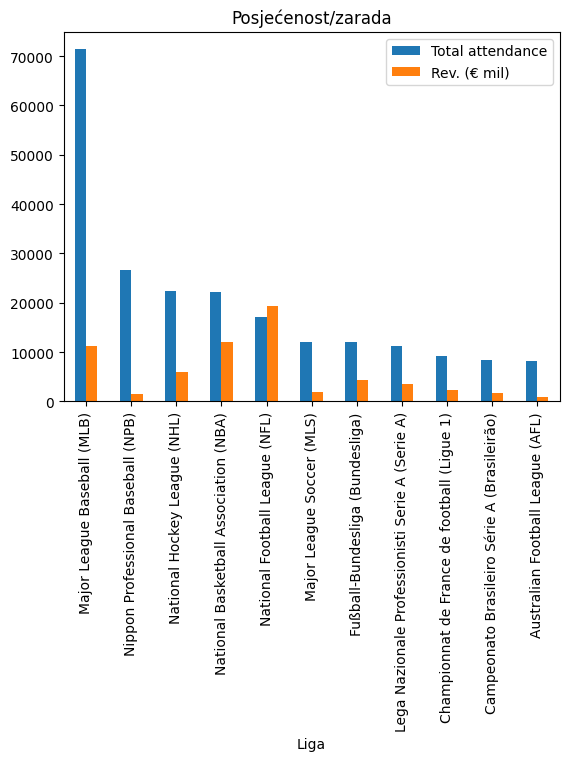

In [24]:
# Graf koji prikazuje posjećenost te zaradu pojedinih liga
df_att_rev.plot.bar(x='League', y=['Total attendance', 'Rev. (€ mil)' ], rot=90) # Definiranje x i y(dvije vrijednosti) osi te ispis imena liga pod kutem od 90 stupnjeva
plt.title('Posjećenost/zarada') # Naziv grafa
plt.xlabel('Liga') # Naziv x osi
plt.show() # Prikaz grafa

In [25]:
# Spremanje integriranih podataka
df_att_rev.to_csv('df_att_rev.csv', index=False) # Spremanje podataka spojenih setova u 'df_att_rev.csv'
dfPrvi.to_csv('dfPrvi.csv', index=False) # Spremanje prvog seta podataka u 'dfPrvi.csv'
dfDrugi.to_csv('dfDrugi.csv', index=False) # Spremanje drugog seta podataka u 'dfDrugi.csv'

In [30]:
import requests
import pandas as pd

url = "https://raw.githubusercontent.com/dpuklek21/pzap/main/prviset.xlsx" # URL

response = requests.get(url) # Preuzimanje Excel datoteke


if response.status_code == 200: # Provjera statusa zahtjeva
    with open("prviset.xlsx", "wb") as f:  # Spremanje datoteke na lokalni disk
        f.write(response.content)


    df = pd.read_excel("prviset.xlsx") # Učitavanje Excel datoteke u pandas DataFrame
    print(df.head())
else:
    print(f"Greška prilikom preuzimanja: {response.status_code}")



   Rank                                 League                 Sport  \
0  Rank                                 League                 Sport   
1     1         National Football League (NFL)     American football   
2     2  National Basketball Association (NBA)            Basketball   
3     3            Major League Baseball (MLB)              Baseball   
4     4                    Premier League (PL)  Association football   

                    Country(ies)   Season  Tier Level Teams[a]  \
0                   Country(ies)   Season  Tier Level    Teams   
1                  United States     2023           1       32   
2  United States _x000D_\nCanada  2023–24           1       30   
3  United States _x000D_\nCanada     2023           1       30   
4                        England  2022–23           1       20   

   Mat­ches / Games / Events          Rev. (€ mil)  \
0  Mat­ches / Games / Events  Rev._x000D_\n(€ mil)   
1                        285                19,299   
2       

In [32]:
import requests

url = "https://raw.githubusercontent.com/dpuklek21/pzap/main/drugi.txt" # URL
response = requests.get(url) # Preuzimanje txt datoteke s

if 'application/json' in response.headers.get('Content-Type', ''): # Provjera koji tip podataka vraća server
    data = response.json() # Ako je tip podataka json ispisuje ih
    print(data)
else:
    print("Response content:", response.text)

Response content: [
    {
        "League": "League",
        "Sport": "Sport",
        "Countries": "Countries",
        "Pyramid level": "Pyramid\nlevel",
        "Season": "Season",
        "Teams": "Teams",
        "Games": "Games",
        "Average capacity": "Average\ncapacity",
        "Average attendance": "Average\nattendance",
        "Average attendance  as % of average capacity": "Average\nattendance \nas % of\naverage\ncapacity",
        "Total attendance": "Total\nattendance",
        "Ref(s)": "Ref(s)"
    },
    {
        "League": "Major League Baseball (MLB)",
        "Sport": "Baseball",
        "Countries": "United States\nCanada",
        "Pyramid level": "1",
        "Season": "2024",
        "Teams": "30",
        "Games": "2,430",
        "Average capacity": "43,103",
        "Average attendance": "29,361",
        "Average attendance  as % of average capacity": "68.12",
        "Total attendance": "71,348,366",
        "Ref(s)": ""
    },
    {
        "League"

**Kritički osvrt:**
Projekt je bio izvediv zbog javno dostupnih podataka o ligama, zaradi, posjećenosti itd. Podatke je bilo potrebno obraditi kako bi se njima moglo korektno baratati i analizirati. Raznim analizama ovih podataka mogue je doći do zaključaka koji faktori utječu na prihode, posjećenost itd. Projekt je uspješno izveden te je cilj ostavren.



**Zakljkučak:** Kroz projekt je provedena integracija, pretprocesiranje, vizualizacija te analiza podataka o najbogatijim sportskim ligama svijeta. Konkretno smo prikazali da postoji određena korelacija između posjećenosti i prihoda lige što je i očekivano.

**Literatura:**
1.   Prvi set podataka: https://en.wikipedia.org/wiki/List_of_professional_sports_leagues_by_revenue
2.   Drugi set podataka: https://en.wikipedia.org/wiki/List_of_attendance_figures_at_domestic_professional_sports_leagues
3. ChatGPT: https://chatgpt.com/share/6790fa8c-7420-800f-a63f-99420102d738
4. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
